## Tracking Stock Market Volatility: The 2025 Tariff Impact on NSE Indices

In [1]:
import NseUtility
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from IPython.display import Image
from pprint import pprint
nse = NseUtility.NseUtils()

In [2]:
from datetime import datetime
from NseHistorical import NSEMasterData
nse = NSEMasterData()
nse.download_symbol_master()
indices = ['NIFTY AUTO','NIFTY BANK','NIFTY ENERGY','NIFTY FMCG','NIFTY IT','NIFTY MEDIA','NIFTY METAL','NIFTY PHARMA','NIFTY REALTY']
start_date = datetime(2024, 12, 31)
end_date = datetime(2025, 6, 6)
price_data = {}
for index in indices:
    print(f"Fetching price for {index}")
    data = nse.get_history(
        symbol=index,
        exchange='NSE',
        start=start_date,
        end=end_date,
        interval='1d'
    )
    if not data.empty and 'Close' in data.columns:
        price_data[index] = data['Close']
    else:
        print(f"No data found for {index}. Skipping.")
if price_data:
    df_close = pd.concat(price_data.values(), axis=1)
    df_close.columns = price_data.keys()
    print(df_close.head())
else:
    print("No data collected for any index.")


Fetching price for NIFTY AUTO
Fetching price for NIFTY BANK
Fetching price for NIFTY ENERGY
Fetching price for NIFTY FMCG
Fetching price for NIFTY IT
Fetching price for NIFTY MEDIA
Fetching price for NIFTY METAL
Fetching price for NIFTY PHARMA
Fetching price for NIFTY REALTY
            NIFTY AUTO  NIFTY BANK  NIFTY ENERGY  NIFTY FMCG  NIFTY IT  \
Timestamp                                                                
2024-12-31    22834.00    50860.20      35188.25    56799.65  43337.80   
2025-01-01    23139.55    51060.60      35430.45    57017.65  43373.10   
2025-01-02    24016.20    51605.55      35715.90    57671.35  44351.75   
2025-01-03    24005.00    50988.80      35894.05    57817.00  43726.55   
2025-01-06    23482.20    49922.00      34731.15    56714.40  43674.85   

            NIFTY MEDIA  NIFTY METAL  NIFTY PHARMA  NIFTY REALTY  
Timestamp                                                         
2024-12-31      1817.85      8649.90      23412.25       1052.35  
2025

In [3]:
df = pd.DataFrame(price_data)

In [4]:
returns = df_close.pct_change().dropna()
roll_vol = returns.rolling(window=30).std() * np.sqrt(252)

In [5]:
roll_vol

,NIFTY AUTO,NIFTY BANK,NIFTY ENERGY,NIFTY FMCG,NIFTY IT,NIFTY MEDIA,NIFTY METAL,NIFTY PHARMA,NIFTY REALTY
Timestamp,,,,,,,,,
2025-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2025-05-30,0.209556,0.163525,0.206863,0.162930,0.272815,0.194599,0.244695,0.160345,0.304209
2025-06-02,0.208711,0.151735,0.205557,0.163851,0.274618,0.194595,0.246389,0.157030,0.309073
2025-06-03,0.201957,0.143197,0.196942,0.162136,0.269960,0.193723,0.240329,0.154160,0.305341


In [6]:
roll_vol = roll_vol.dropna()

C:\Users\Keshi\AppData\Local\Temp\ipykernel_11980\663727852.py:18: DeprecationWarning:


Support for Kaleido versions less than 1.0.0 is deprecated and will be removed after September 2025.
Please upgrade Kaleido to version 1.0.0 or greater (`pip install 'kaleido>=1.0.0'` or `pip install 'plotly[kaleido]'`).




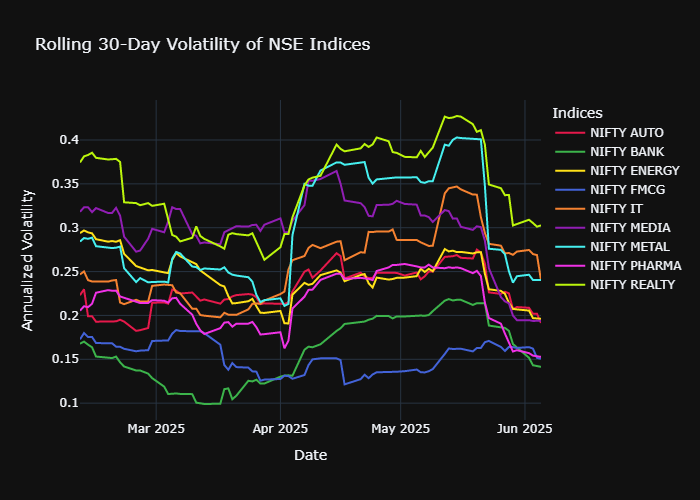

In [7]:
fig = go.Figure()
colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe']
for i, col in enumerate(roll_vol.columns):
    fig.add_trace(go.Scatter(
        x=roll_vol.index,
        y=roll_vol[col],
        mode='lines',
        name=col,
        line=dict(color=colors[i % len(colors)])
    ))
fig.update_layout(
    title="Rolling 30-Day Volatility of NSE Indices",
    xaxis_title="Date",
    yaxis_title="Annualized Volatility",
    template='plotly_dark',
    legend_title="Indices"
)
fig.write_image("volatility_plot.png")
Image("volatility_plot.png")
